<a href="https://colab.research.google.com/github/Nandhu2k3/Machine-learning-Regressions-predictions/blob/main/Single_Layer_perceptron_for_Logical_Gates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['target'])


In [2]:
X = df.iloc[:100, [0, 1]].values
y = df.iloc[:100, 4].values
y = np.where(y == 0, -1, 1)


In [3]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        for _ in range(self.n_iterations):
            for i in range(X.shape[0]):
                y_pred = np.dot(X[i], self.weights) + self.bias
                
                if y_pred * y[i] <= 0:
                    self.weights += self.learning_rate * y[i] * X[i]
                    self.bias += self.learning_rate * y[i]


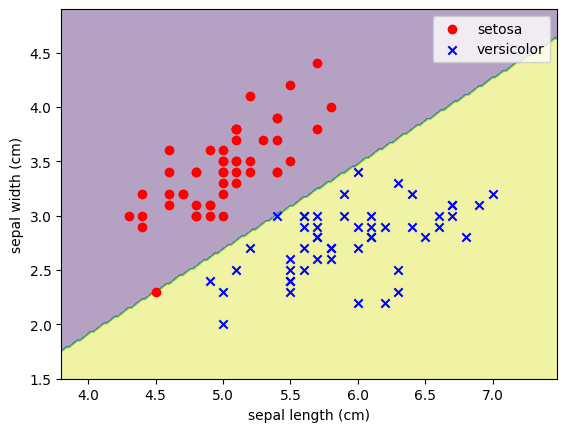

In [4]:
import matplotlib.pyplot as plt

perceptron = Perceptron()
perceptron.fit(X, y)

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], perceptron.weights) + perceptron.bias
Z = np.where(Z <= 0, -1, 1)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.show()
